In [258]:
import pandas as pd
import numpy as np


In [259]:
df= pd.read_csv('Data/spam.csv', encoding='latin-1')

In [260]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2993,ham,"No idea, I guess we'll work that out an hour a...",NaN,NaN,NaN
3168,ham,"Haven't seen my facebook, huh? Lol!",NaN,NaN,NaN
374,spam,"Thanks for your Ringtone Order, Reference T91....",NaN,NaN,NaN
4195,ham,"Sorry, it's a lot of friend-of-a-friend stuff,...",NaN,NaN,NaN
821,ham,On the road so cant txt,NaN,NaN,NaN


In [261]:
df.shape

(5572, 5)

In [262]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evalution
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [264]:
# dropping all three columns as they are not useful for our purpose

In [265]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [266]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [267]:
# Renaming the columns for better understanding

In [268]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [269]:
df.sample(5)

,target,text
5301,ham,At WHAT TIME should i come tomorrow
2504,ham,"Hello, my boytoy! I made it home and my consta..."
3599,ham,I know you mood off today
1331,ham,Good Morning plz call me sir
4126,ham,"Sorry, I'll call later"


In [270]:
# We will map ham to 0 and spam to 1 with label encoding

In [271]:
from sklearn.preprocessing import LabelEncoder

In [272]:
encoder= LabelEncoder()

In [273]:
df['target'] = encoder.fit_transform(df['target'])

In [274]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [275]:
# Missing Values Handling 

In [276]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [277]:
# checking for duplicate values

In [278]:
df.duplicated().sum()

np.int64(403)

In [279]:
#removing duplicate values

In [280]:
df.drop_duplicates(keep='first', inplace=True)

In [281]:
df.duplicated().sum()

np.int64(0)

In [282]:
df.shape

(5169, 2)

## 2. EDA

In [283]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [284]:
# Lets see the distribution of ham and spam messages

In [285]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [286]:
import matplotlib.pyplot as plt

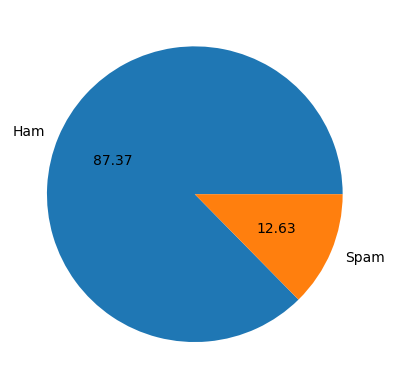

In [287]:
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

In [288]:
# Data is imbalanced but we will handle that later

In [289]:
# we will use natural language toolkit for text preprocessing and find the length of each message

In [290]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/satyam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [291]:
df['num_characters'] = df['text'].apply(len)

In [292]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [293]:
# num of words

In [294]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
# with lambda function we are applying len function after tokenizing each message into words

In [295]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [296]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
# num of sentences using sent_tokenize

In [297]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
4050,0,"Motivate Behind every darkness, there is a shi...",153,30,2
1904,0,Wah... Okie okie... Muz make use of e unlimite...,59,14,1
5183,0,"Fuuuuck I need to stop sleepin, sup",35,8,1
2359,1,Spook up your mob with a Halloween collection ...,149,29,1
1453,0,Stupid.its not possible,23,3,1


In [298]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [299]:
# Describe for Ham messages
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [300]:
# Describe for Spam messages
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [301]:
import seaborn as sns

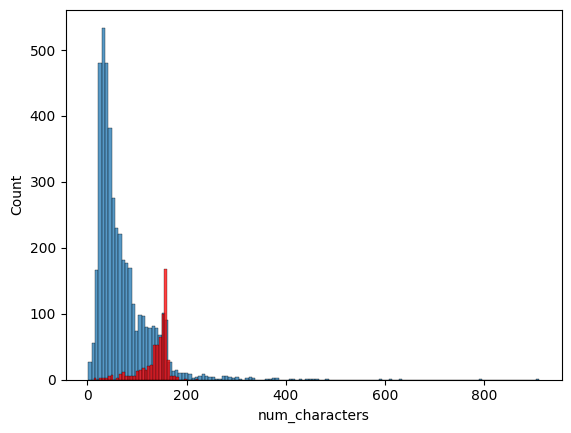

In [302]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

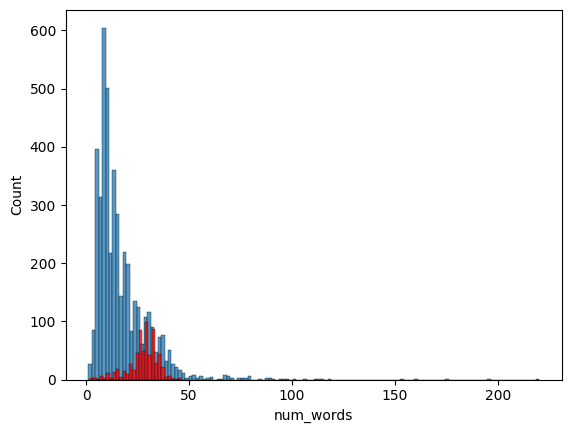

In [303]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

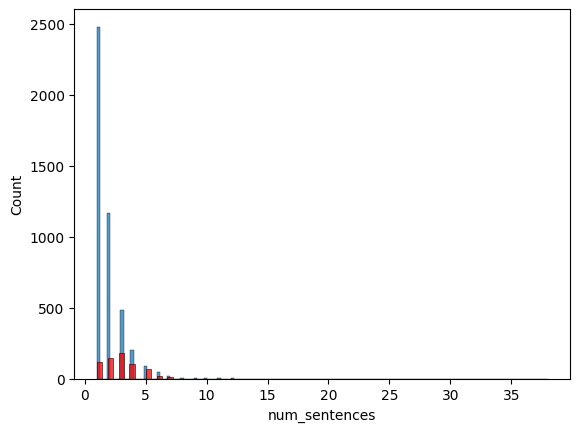

In [304]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.show()

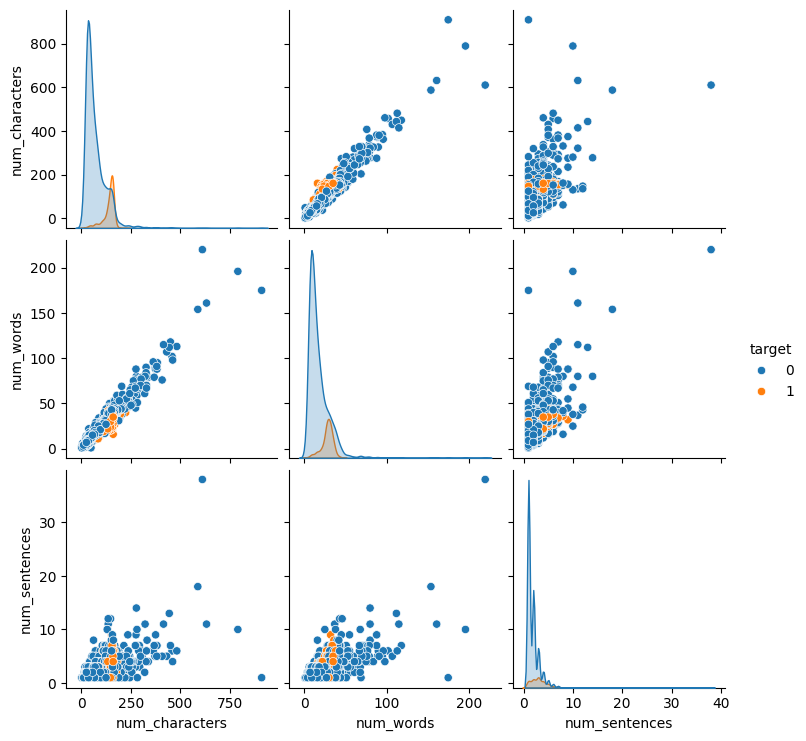

In [305]:
sns.pairplot(df, hue='target')
plt.show()

In [306]:
# There are outliers present in the data which can be removed later

<Axes: >

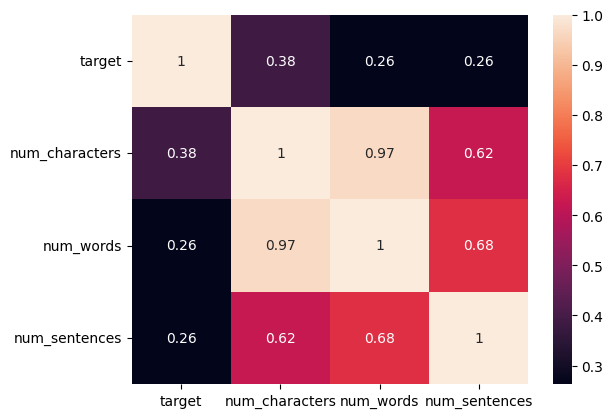

In [307]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

In [308]:
# We can see that num_characters and num_words are highly correlated
# This indicates that as the number of characters increases, the number of words also tends to increase.
# So We can consider removing one of these features to reduce redundancy in our dataset.

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Stemming

In [309]:
from nltk.corpus import stopwords

In [310]:
import string


In [311]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [312]:
def transform_text(text):
    # Lower case
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    # Stopwords removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    # Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return y
    

In [313]:
# Testing the function
transform_text("Hello friends, I am Satyam Kumar!! @ 123")

['hello', 'friend', 'satyam', 'kumar', '123']

In [314]:
df['text_transformed'] = df['text'].apply(transform_text)

In [316]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,text_transformed
1453,0,Stupid.its not possible,23,3,1,[possibl]
895,0,Superb Thought- \Be grateful that u dont have ...,150,32,2,"[superb, grate, u, dont, everyth, u, want, mea..."
2183,0,"Chinatown got porridge, claypot rice, yam cake...",131,28,2,"[chinatown, got, porridg, claypot, rice, yam, ..."
4734,0,Oh k:)after that placement there ah?,36,10,1,"[oh, k, placement, ah]"
171,0,"Hmmm.. Thk sure got time to hop ard... Ya, can...",94,25,2,"[hmmm, thk, sure, got, time, hop, ard, ya, go,..."


In [317]:
# Making a word cloud for spam and ham messages

In [318]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [319]:
spam_wc = wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

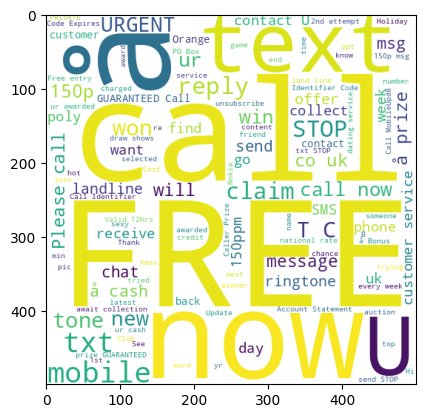

In [320]:
plt.imshow(spam_wc)

In [321]:
ham_wc = wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

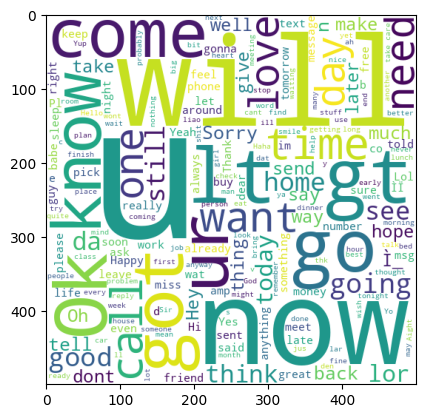

In [322]:
plt.imshow(ham_wc)

In [323]:
spam_corpus = []
for msg in df[df['target']==1]['text_transformed'].tolist():
    for word in msg:
        spam_corpus.append(word)
        

In [324]:
len(spam_corpus)

9939

In [325]:
from collections import Counter
Counter_Spam = pd.DataFrame(Counter(spam_corpus).most_common(30))

ModuleNotFoundError: No module named 'pandas.core.methods.to_dict'

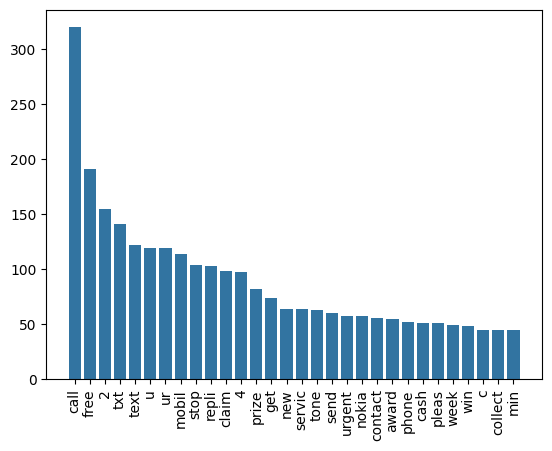

In [326]:
plt.xticks(rotation='vertical')
sns.barplot(x=[i[0] for i in Counter_Spam.values], y=[i[1] for i in Counter_Spam.values])
plt.show()

In [327]:
ham_corpus = []
for msg in df[df['target']==0]['text_transformed'].tolist():
    for word in msg:
        ham_corpus.append(word)
        

In [328]:
len(ham_corpus)

35404

In [329]:
Counter_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

ModuleNotFoundError: No module named 'pandas.core.methods.to_dict'

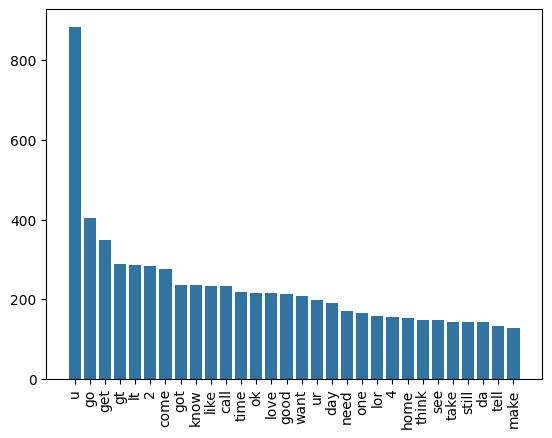

In [330]:
plt.xticks(rotation='vertical')
sns.barplot(x=[i[0] for i in Counter_ham.values], y=[i[1] for i in Counter_ham.values])
plt.show()

## 4. Model Building

In [331]:
# We will use native model because on textual data it is best.
# but first we need to convert our text data into numerical data

In [332]:
# Text Vectorization
# using Bag of Words

In [333]:
df.head()

,target,text,num_characters,num_words,num_sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [334]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [340]:
# `text_transformed` currently contains lists of tokens (from the tokenizer/stemmer).
# CountVectorizer expects raw strings (it will tokenize itself), so join the tokens back to strings.
# Create a new column with joined tokens and feed that to CountVectorizer.

# Convert list-of-tokens -> space-joined string
df['text_transformed_str'] = df['text_transformed'].apply(lambda tokens: " ".join(tokens))

# Vectorize
X = cv.fit_transform(df['text_transformed_str']).toarray()

In [342]:
X.shape

(5169, 6708)

In [343]:
y=df['target'].values

In [345]:
from sklearn.model_selection import train_test_split

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [354]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [355]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [357]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [358]:
# It is not performing well because GaussianNB is not suitable for text data(precision score is low)

In [359]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [360]:
# It is good but not well enough(We want maximum precision score)

In [361]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [362]:
# Bnb is performing the best

In [363]:
# But Let's try Tf-IDF Vectorizer

In [364]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [365]:
tf = TfidfVectorizer()

In [366]:
X = tf.fit_transform(df['text_transformed_str']).toarray()

In [367]:
X.shape

(5169, 6708)

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [369]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2)) # With tf-id We are able to get the best precision So we are going to use this.

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [371]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [372]:
# tf --> MNB

In [373]:
# Lets train more model and see

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier , ExtraTreesClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

In [377]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [378]:
clfs = {
    'SVC': svc,
    'KNC': knc,
    'DTC': dtc,
    'LRC': lrc,
    'RFC': rfc,
    'ABC': abc,
    'BGC': bgc,
    'ETC': etc,
    'GBC': gbc,
    'XGB': xgb
}

In [379]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [380]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_clf(clf, X_train, y_train, X_test, y_test)
    print(f"Accuracy score for {name} is {current_accuracy}")
    print(f"Precision score for {name} is {current_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79efe055bce0>
Traceback (most recent call last):
  File "/home/satyam/ML_Project/SMS_spam_detection/.venv/lib/python3.12/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/satyam/ML_Project/SMS_spam_detection/.venv/lib/python3.12/site-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/home/satyam/ML_Project/SMS_spam_detection/.venv/lib/python3.12/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                  

Accuracy score for SVC is 0.9729206963249516
Precision score for SVC is 0.9741379310344828
Accuracy score for KNC is 0.9003868471953579
Precision score for KNC is 1.0
Accuracy score for DTC is 0.9342359767891683
Precision score for DTC is 0.8301886792452831
Accuracy score for LRC is 0.9516441005802708
Precision score for LRC is 0.94


/home/satyam/ML_Project/SMS_spam_detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/satyam/ML_Project/SMS_spam_detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Accuracy score for RFC is 0.971953578336557
Precision score for RFC is 1.0
Accuracy score for ABC is 0.9245647969052224
Precision score for ABC is 0.8409090909090909
Accuracy score for BGC is 0.9584139264990329
Precision score for BGC is 0.8625954198473282
Accuracy score for ETC is 0.9729206963249516
Precision score for ETC is 0.9824561403508771
Accuracy score for GBC is 0.9526112185686654
Precision score for GBC is 0.9238095238095239
Accuracy score for XGB is 0.9748549323017408
Precision score for XGB is 0.9516129032258065


In [383]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by='Precision', ascending=False)

In [384]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.900387,1.000000
4,RFC,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
9,XGB,0.974855,0.951613
3,LRC,0.951644,0.940000
8,GBC,0.952611,0.923810
6,BGC,0.958414,0.862595
5,ABC,0.924565,0.840909
2,DTC,0.934236,0.830189


In [385]:
# All the models are performing well but We will go with the model which is performing the best i.e Multinomial Naive Bayes with Tf-IDF Vectorizer

## 5. Model Improvement

In [386]:
# 1. Change the max_features parameter in the TfidfVectorizer

In [405]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text_transformed_str']).toarray()

In [406]:
X.shape


(5169, 3000)

In [407]:
y=df['target'].values

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [409]:
train_clf(mnb, X_train, y_train, X_test, y_test)

(0.9709864603481625, 1.0)

In [393]:
# So we improved the accuracy score by changing the max_features parameter

In [394]:
# 2. Lets scale the data using MinMaxScaler and see if it improves the performance

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
#y=df['target'].values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#train_clf(mnb, X_train, y_train, X_test, y_test)

(0.9787234042553191, 0.9461538461538461)

In [398]:
# Due to scaling the data the model performance has decreased a bit. So we will not use this method.

In [399]:
# Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [400]:
voting_clf = VotingClassifier(estimators=[('svc', svc), ('mnb', mnb), ('etc', etc)], voting='soft')

In [401]:
voting_clf.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svc', ...), ('mnb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [402]:
y_pred = voting_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9806576402321083
0.9682539682539683


In [403]:
# The voting classifier is not performing better than the Multinomial Naive Bayes model. So we will stick to that only.

## 6. Pipeline 
 * i. Preprocessing
 * ii. Vectorization
 * iii. Predicting

In [404]:
import pickle

In [410]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))